# Luce-Choice-Ratio

In [1]:
# Uncomment the following line when running on Google Colab
# !pip install "autora"

The luce choice ratio experiment has to be initialized with a specific formula and effects.

In [2]:
import numpy as np
from autora.experiment_runner.synthetic.psychology.luce_choice_ratio import  luce_choice_ratio

s = luce_choice_ratio()

Check the docstring to get information about the model

In [3]:
help(luce_choice_ratio)

Help on function luce_choice_ratio in module autora.experiment_runner.synthetic.psychology.luce_choice_ratio:

luce_choice_ratio(name='Luce-Choice-Ratio', resolution=8, maximum_similarity=10, focus=0.8)
    Luce-Choice-Ratio
    
    Args:
        name: name of the experiment
        added_noise: standard deviation of normally distributed noise added to y-values
        resolution: number of allowed values for stimulus DVs
        maximum_similarity: upperbound for DVs
        focus: parameter measuring participant focus
        random_state: integer used to seed the random number generator
    
    Shepard-Luce Choice Rule according to:
        - Equation (4) in Logan, G. D., & Gordon, R. D. (2001).
        - and in Executive control of visual attention in dual-task situations.
            Psychological review, 108(2), 393.
        - Equation (5) in Luce, R. D. (1963). Detection and recognition.
    
    Examples:
        We can instantiate a Shepard-Cue Choice Experiment. We use a se

... or use the describe function:

In [4]:
from autora.experiment_runner.synthetic.utilities import describe

print(describe(s))


    Luce-Choice-Ratio

    Args:
        name: name of the experiment
        added_noise: standard deviation of normally distributed noise added to y-values
        resolution: number of allowed values for stimulus DVs
        maximum_similarity: upperbound for DVs
        focus: parameter measuring participant focus
        random_state: integer used to seed the random number generator

    Shepard-Luce Choice Rule according to:
        - Equation (4) in Logan, G. D., & Gordon, R. D. (2001).
        - and in Executive control of visual attention in dual-task situations.
            Psychological review, 108(2), 393.
        - Equation (5) in Luce, R. D. (1963). Detection and recognition.

    Examples:
        We can instantiate a Shepard-Cue Choice Experiment. We use a seed to get replicable results:
        >>> l_s_experiment = luce_choice_ratio()

        We can look at the name of the experiment:
        >>> l_s_experiment.name
        'Luce-Choice-Ratio'

        To call the gr

The synthetic experiement `s` has properties like the name of the experiment:

In [5]:
s.name

'Luce-Choice-Ratio'

... a valid variables description:

In [6]:
s.variables

VariableCollection(independent_variables=[IV(name='similarity_category_A1', value_range=(0.1, 10), allowed_values=array([ 0.1       ,  1.51428571,  2.92857143,  4.34285714,  5.75714286,
        7.17142857,  8.58571429, 10.        ]), units='similarity', type=<ValueType.REAL: 'real'>, variable_label='Similarity with Category A1', rescale=1, is_covariate=False), IV(name='similarity_category_A2', value_range=(0.1, 10), allowed_values=array([ 0.1       ,  1.51428571,  2.92857143,  4.34285714,  5.75714286,
        7.17142857,  8.58571429, 10.        ]), units='similarity', type=<ValueType.REAL: 'real'>, variable_label='Similarity with Category A2', rescale=1, is_covariate=False), IV(name='similarity_category_B1', value_range=(0.1, 10), allowed_values=array([ 0.1       ,  1.51428571,  2.92857143,  4.34285714,  5.75714286,
        7.17142857,  8.58571429, 10.        ]), units='similarity', type=<ValueType.REAL: 'real'>, variable_label='Similarity with Category B1', rescale=1, is_covariate=Fal

... now we can generate the full domain of the data

In [7]:
x = s.domain()
x

array([[ 0.1       ,  0.1       ,  0.1       ,  0.1       ],
       [ 0.1       ,  1.51428571,  0.1       ,  0.1       ],
       [ 0.1       ,  2.92857143,  0.1       ,  0.1       ],
       ...,
       [10.        ,  7.17142857, 10.        , 10.        ],
       [10.        ,  8.58571429, 10.        , 10.        ],
       [10.        , 10.        , 10.        , 10.        ]])

... the experiment_runner which can be called to generate experimental results:

In [8]:
experiment_data = s.run(x)
experiment_data

,similarity_category_A1,similarity_category_A2,similarity_category_B1,similarity_category_B2,choose_A1
0,0.1,0.100000,0.1,0.1,0.430878
1,0.1,1.514286,0.1,0.1,0.067843
2,0.1,2.928571,0.1,0.1,0.043649
3,0.1,4.342857,0.1,0.1,0.022639
4,0.1,5.757143,0.1,0.1,0.016252
...,...,...,...,...,...
4091,10.0,4.342857,10.0,10.0,0.516494
4092,10.0,5.757143,10.0,10.0,0.480859
4093,10.0,7.171429,10.0,10.0,0.451755
4094,10.0,8.585714,10.0,10.0,0.423810


... a function to plot the ground truth (no noise):

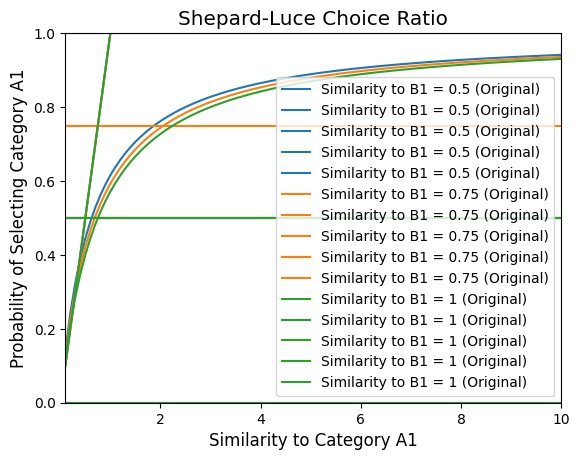

In [9]:
s.plotter()

... against a fitted model if it exists:

/Users/younesstrittmatter/Documents/GitHub/AutoRA/autora-synthetic/venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/younesstrittmatter/Documents/GitHub/AutoRA/autora-synthetic/venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/younesstrittmatter/Documents/GitHub/AutoRA/autora-synthetic/venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


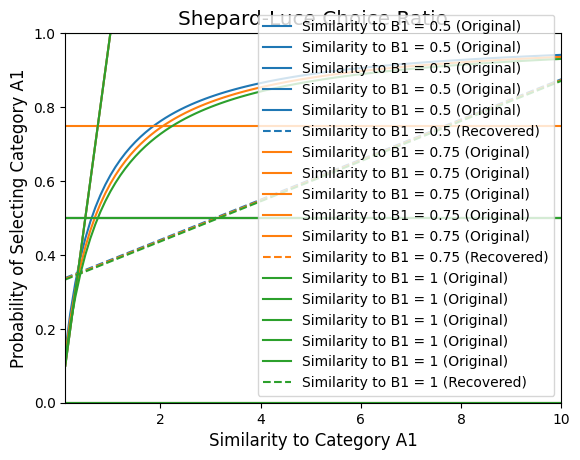

In [10]:
from sklearn.linear_model import LinearRegression
ivs = [iv.name for iv in s.variables.independent_variables]
dvs = [dv.name for dv in s.variables.dependent_variables]
X = experiment_data[ivs]
y = experiment_data[dvs]
model = LinearRegression().fit(X, y)
s.plotter(model)

We can wrap this functions to use with the state logic of AutoRA:
First, we create the state with the variables:

In [11]:
from autora.state import StandardState, on_state, experiment_runner_on_state, estimator_on_state
from autora.experimentalist.grid import grid_pool
from autora.experimentalist.random import random_sample

# We can get the variables from the runner
variables = s.variables

# With the variables, we initialize a StandardState
state = StandardState(variables)

Wrap the experimentalists in `on_state` function to use them on state:

In [12]:
# Wrap the functions to use on state
# Experimentalists:
pool_on_state = on_state(grid_pool, output=['conditions'])
sample_on_state = on_state(random_sample, output=['conditions'])

state = pool_on_state(state)
state = sample_on_state(state, num_samples=2)
print(state.conditions)

      similarity_category_A1  similarity_category_A2  similarity_category_B1  \
2437                5.757143                8.585714                     0.1   
1277                2.928571                4.342857                    10.0   

      similarity_category_B2  
2437                7.171429  
1277                7.171429  


Wrap the runner with the `experiment_runner_on_state` wrapper to use it on state:

In [13]:
# Runner:
run_on_state = experiment_runner_on_state(s.run)
state = run_on_state(state)

state.experiment_data

,similarity_category_A1,similarity_category_A2,similarity_category_B1,similarity_category_B2,choose_A1
2437,5.757143,8.585714,0.1,7.171429,0.356389
1277,2.928571,4.342857,10.0,7.171429,0.251984


Wrap the regressor with the `estimator_on_state` wrapper:

In [15]:
theorist = LinearRegression()
theorist_on_state = estimator_on_state(theorist)

state = theorist_on_state(state)
# Access the last model:
model = state.models[-1]


print(f"choose_A1 = "
      f"{model.coef_[0][0]:.2f}*similarity_category_A1 "
      f"{model.coef_[0][1]:.2f}*similarity_category_A2 "
      f"{model.coef_[0][2]:.2f}*similarity_category_B1 "
      f"{model.coef_[0][3]:.2f}*similarity_category_B2 "
      f"{model.intercept_[0]:+.2f} ")

choose_A1 = 0.00*similarity_category_A1 0.00*similarity_category_A2 -0.01*similarity_category_B1 0.00*similarity_category_B2 +0.31 
